학번: 20175105

이름: 곽영주



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1: Test exam admission

이번 과제에서는 본인은 대학 입학처 직원으로 학생 별 2과목 성적 기반으로 합격 (`label 1`)과 불합격 (`label 0`)를 결정하는 예측 시스템을 개발하려합니다. 다음은 data 가져오는 과정입니다.

- data 형태: CSV file
- 1단계: CSV file을 pandas dataframe으로 가져오기
- Part 1 과정은 지난 실습의 복습 부분입니다

In [2]:
df = pd.read_csv('exam_dataset.csv')
df

,exam1,exam2,admission
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
...,...,...,...
95,83.489163,48.380286,1.0
96,42.261701,87.103851,1.0
97,99.315009,68.775409,1.0
98,55.340018,64.931938,1.0


Dataframe에서 numpy array로 column 별 변환

In [3]:
Xexam = df[['exam1', 'exam2']].to_numpy()
yexam = df['admission'].to_numpy().reshape(-1,1)

Dataset plot

Text(0, 0.5, 'Exam 2')

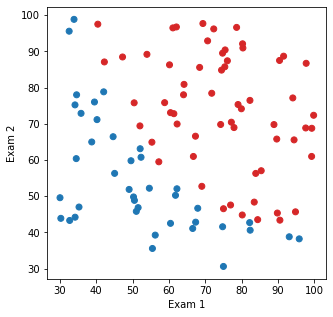

In [4]:
plt.rcParams["figure.figsize"] = (5,5)
colormap = np.array(['tab:blue', 'tab:red'])
plt.scatter(Xexam[:,0], Xexam[:,1], c=colormap[yexam.astype(int)].reshape(-1))
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

## 1-1. Logistic Regression

모델은 logistic regression을 사용하도록 하겠습니다.


### Problem 1 

- `model` 함수 구현
- `cost` 함수 구현 ()
- `decision` 함수 구현 
- 위 함수는 이전 실습과 동일한 방법으로 (조건)으로 구현할 것

In [5]:
def log(x):
    x = np.clip(x, 1e-20, 1e20)
    return np.log(x)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def model(X, theta):
    return sigmoid(np.matmul(X, theta))

In [8]:
def cost(H, y):
    return (-np.matmul(y.T, log(H))-np.matmul((1-y).T, log(1-H))) / H.shape[0]

In [9]:
def decision(H, p, y):
    pred = np.ones_like(y)
    pred[H < p] = 0
    accuracy = np.mean(pred == y)
    return pred, accuracy

### Problem 2
- `grad` 함수 구현
- L2 regularization 구현할 것!

- `input` (X, H, y, theta, rp)
- `output` Regularization 적용한 gradient

\begin{align*}
\nabla_\theta J(\theta) = \frac{1}{m}X^T(H-y) + \frac{2\lambda}{m}\theta
\end{align*}

In [10]:
def grad(X, H, y, theta, rp):
    return (np.matmul(X.T, H-y) / X.shape[0]) + (rp * 2.0 * theta / X.shape[0])

### Problem 3

- 학습을 진행하여 최적 `theta`를 찾는다
- `epoch`별 `loss`와 `accuracy` 계산하여 plot

In [11]:
Xexam_tilde = np.hstack([np.ones((Xexam.shape[0], 1)), Xexam])

In [12]:
Xexam_tilde.shape

(100, 3)

In [13]:
num_epoch = 50000 # epoch 총 수
lr = 0.001 # learning rate
rp = 0.0
# epoch 별 loss 저장하기 위한 array
loss = np.zeros(num_epoch)
accuracy = np.zeros(num_epoch)

# 학습
theta = np.random.randn(Xexam.shape[1]+1, 1)

skip = 10000
for e in range(num_epoch):
    H = model(Xexam_tilde, theta)
    loss[e] = cost(H, yexam)
    accuracy[e] = decision(H, 0.5, yexam)[1]
    G = grad(Xexam_tilde, H, yexam, theta, rp)
    theta = theta - lr * G
    
    if e%skip == 0:
        print(f'--- starting epoch {e} ----')
        print('accuracy = ', accuracy[e])
        print('loss = ', loss[e])
    

--- starting epoch 0 ----
accuracy =  0.6
loss =  13.469272519107454
--- starting epoch 10000 ----
accuracy =  0.6
loss =  0.6910922987664014
--- starting epoch 20000 ----
accuracy =  0.6
loss =  0.6366219836894556
--- starting epoch 30000 ----
accuracy =  0.6
loss =  0.5907518692809114
--- starting epoch 40000 ----
accuracy =  0.65
loss =  0.5521228736346673


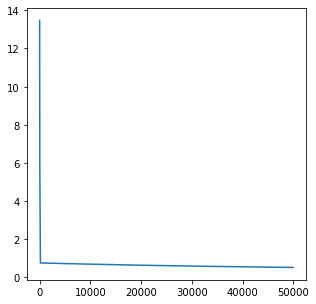

In [14]:
plt.plot(loss)

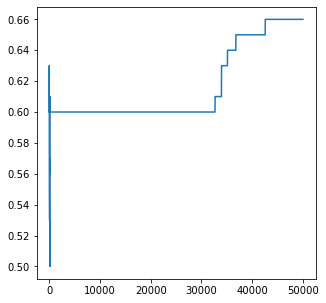

In [15]:
plt.plot(accuracy)

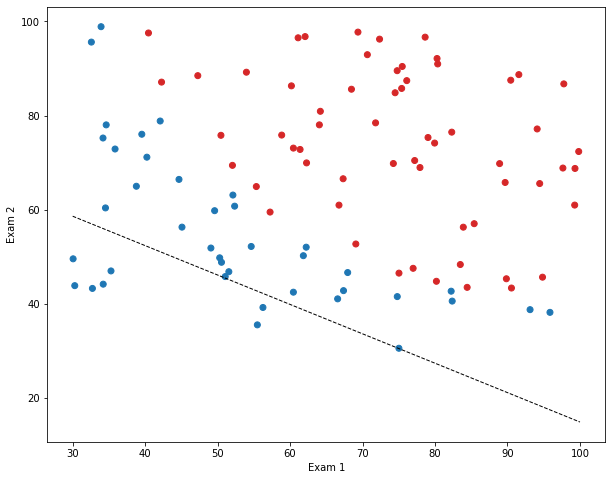

In [16]:
import helper
helper.plot_exam(Xexam_tilde, yexam, theta)

# Normalizing the data

### Problem 4

Training set의 평균 값 

\begin{equation}
\mu = \frac{1}{m}\sum_{i=1}^m x^{(i)}
\end{equation}
과 표준편차 $\sigma$ 

\begin{align*}
\sigma^2_j &= \frac{1}{m}\sum_{i=1}^m ( x^{(i)}_j-\mu_j )^2
\end{align*}

을 구하세요.

In [17]:
# 답 작성
mu = np.mean(Xexam, axis=0)
sigma = np.std(Xexam, axis=0)

In [18]:
print('mu=', mu)
print('sigma=', sigma)

mu= [65.64427406 66.22199809]
sigma= [19.36068671 18.48963567]


### Problem 5

data를 normalize하여 normalize된 dataset을 return하는 함수 
`normalize_data`를 완성하세요.

- input: `X` dataset
- output: `mu`, `std`, `Xnorm`
    - `mu`는 `X`의 feature별 평균 벡터
    - `std`는 `X`의 feature별 표준편차 벡터
    - `Xnorm`는 normalized dataset

In [19]:
def nomalize_data(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    Xnorm = (X - mu) / std
    return mu, std, Xnorm
    

In [20]:
mu, std, Xnorm = nomalize_data(Xexam)

In [21]:
print('Xbar mean = ', np.mean(Xnorm, axis=0))
print('Xbar std = ', np.std(Xnorm, axis=0))

Xbar mean =  [-8.10462808e-17  1.14797061e-15]
Xbar std =  [1. 1.]


### Problem 6
Normalized data로 학습하기

In [22]:
Xexam_tilde = np.hstack([np.ones((Xnorm.shape[0], 1)), Xnorm])

In [23]:
num_epoch = 1000 # epoch 총 수
lr = 0.01 # learning rate
rp = 0.0
# epoch 별 loss 저장하기 위한 array
loss = np.zeros(num_epoch)
accuracy = np.zeros(num_epoch)

theta = np.random.randn(Xnorm.shape[1]+1, 1)

skip = 100
for e in range(num_epoch):
    H = model(Xexam_tilde, theta)
    loss[e] = cost(H, yexam)
    accuracy[e] = decision(H, 0.5, yexam)[1]
    G = grad(Xexam_tilde, H, yexam, theta, rp)
    theta = theta - lr * G
    
    if e%skip == 0:
        print(f'--- starting epoch {e} ----')
        print('accuracy = ', accuracy[e])
        print('loss = ', loss[e])


--- starting epoch 0 ----
accuracy =  0.65
loss =  0.681096123846597
--- starting epoch 100 ----
accuracy =  0.72
loss =  0.5715007603849077
--- starting epoch 200 ----
accuracy =  0.77
loss =  0.4921557473145121
--- starting epoch 300 ----
accuracy =  0.82
loss =  0.4348274569916478
--- starting epoch 400 ----
accuracy =  0.85
loss =  0.39328058037490055
--- starting epoch 500 ----
accuracy =  0.86
loss =  0.36294016797577217
--- starting epoch 600 ----
accuracy =  0.88
loss =  0.3405064903066412
--- starting epoch 700 ----
accuracy =  0.89
loss =  0.3236354484542929
--- starting epoch 800 ----
accuracy =  0.91
loss =  0.3106848555346182
--- starting epoch 900 ----
accuracy =  0.91
loss =  0.30051598297797144


# Part 2: Microchip factory

본 과제에서는 반도체 생산 공장의 직원임을 가정합니다. 생산된 반도체를 2가지 test를 통해서 점수를 받았다고 가정합니다. 이경우 불량 (`label 0`)과 좋은 품질 (`label 1`)으로 예측하는 시스템을 만드는 것이 목표입니다.


Dataset 구조

In [24]:
df = pd.read_csv('microchip_dataset.csv')
df

,microchip test1,microchip test2,quality
0,-0.28283,0.47295,1.0
1,-0.60541,0.59722,1.0
2,0.64459,-0.14108,1.0
3,-0.23675,-0.63816,0.0
4,-0.43836,0.21711,1.0
...,...,...,...
113,-0.16187,0.80190,1.0
114,0.10311,0.77997,0.0
115,-0.42108,-0.27266,1.0
116,0.20104,-0.60161,1.0


In [25]:
Xmicro = df[['microchip test1', 'microchip test2']].to_numpy()
ymicro = df['quality'].to_numpy().reshape(-1,1)

Text(0, 0.5, 'Microchip Test 2')

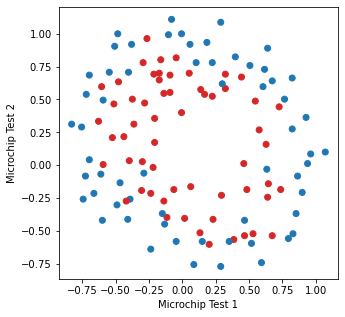

In [26]:
plt.rcParams["figure.figsize"] = (5,5)
colormap = np.array(['tab:blue', 'tab:red'])
plt.scatter(Xmicro[:,0], Xmicro[:,1], c=colormap[ymicro.astype(int)].reshape(-1))
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

## 2-1 Feature Mapping

이번 학습에서는 위의 data 모양을 봤을때, 선형 분류가 불가능하다는 것을 확인하실 수 있습니다.

이번에는 feature mapping을 통해서 2개 feature를 다음 방식으로 늘리도록 하겠습니다.

\begin{align*}
h_\theta(x) = g(\phi(x)^T\theta)
\end{align*}

\begin{align*}
\phi(x) = \begin{bmatrix}
1\\
x_1\\
x_2\\
x_1^2\\
x_1x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1x_2^5\\
x_2^6
\end{bmatrix}
\end{align*}

즉 2개 feature data를 6차함수로
변경해주는 feature mapping 함수를 작성하세요.
결과는 총 28개 feature로 나옵니다.


- Vectorized implemantation of cost function
\begin{align*}
H = \phi(X)\theta
\end{align*}
\begin{align*}
\phi(X)\theta = \begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)}& (x_1^{(1)})^2 & \cdots &  (x_2^{(1)})^6\\
1 & x^{(2)} & x_2^{(2)}& (x_1^{(2)})^2 & \cdots &  (x_2^{(2)})^6\\
\vdots & \ddots & \ddots & \vdots \\
1 & x^{(m)} & x_2^{(m)}& (x_1^{(m)})^2 & \cdots &  (x_2^{(m)})^6\\
\end{bmatrix}\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_{27} \\
\end{bmatrix}=
\begin{bmatrix}
\phi(x^{(1)})^T \theta \\
\phi(x^{(2)})^T \theta \\
\vdots \\
\phi(x^{(m)})^T \theta \\
\end{bmatrix}
\end{align*}
- Cost function
\begin{align*}
J(\theta)  &=\frac{1}{m}\sum_{i=1}^m (\phi(x^{(i)})^T\theta - y^{(i)})^2\\
&= \frac{1}{m}(\phi(X)\theta - y)^T(\phi(X)\theta - y)
\end{align*}
- Gradient
\begin{align*}
\nabla_\theta J(\theta) = \phi(X)^T(\phi(X)\theta-y)
\end{align*}


In [27]:
def mapFeature(X, degree):
    output = []
    for i in range(degree+1):
        for j in range(int(i)+1):
            output.append((X[:,0]**(i-j))*(X[:,1]**(j)))
            
    return np.array(output).T

### Problem 7
위 `mapFeature` 함수가 왜 필요한지, 무엇을 수행하는 것인지 설명하고, 코드를 분석하세요

답 작성) `mapFeature`함수는 자유도를 높일 수 있다, 코드분석 : `X`에 차수를 순차적으로 곱한다.

In [28]:
degree = 6
Xmicro_mf = mapFeature(Xmicro, degree)


### Problem 8

학습을 진행하여 최적 `theta`를 찾으세요

In [29]:
num_epoch = 100000 # epoch 총 수
lr = 10 # learning rate
rp = 0.0
# epoch 별 loss 저장하기 위한 array
loss = np.zeros(num_epoch)
accuracy = np.zeros(num_epoch)

theta = np.random.randn(Xmicro_mf.shape[1], 1)

skip = 10000
for e in range(num_epoch):
    H = model(Xmicro_mf, theta)
    loss[e] = cost(H, ymicro)
    accuracy[e] = decision(H, 0.5, ymicro)[1]
    G = grad(Xmicro_mf, H, ymicro, theta, rp)
    theta = theta - lr * G
    
    if e%skip == 0:
        print(f'--- starting epoch {e} ----')
        print('accuracy = ', accuracy[e])
        print('loss = ', loss[e])


--- starting epoch 0 ----
accuracy =  0.5084745762711864
loss =  1.148499274306018
--- starting epoch 10000 ----
accuracy =  0.864406779661017
loss =  0.2936088907257699
--- starting epoch 20000 ----
accuracy =  0.8813559322033898
loss =  0.28826128488597247
--- starting epoch 30000 ----
accuracy =  0.8813559322033898
loss =  0.2853333754810658
--- starting epoch 40000 ----
accuracy =  0.8813559322033898
loss =  0.28334017476561996
--- starting epoch 50000 ----
accuracy =  0.8813559322033898
loss =  0.2818336118203804
--- starting epoch 60000 ----
accuracy =  0.8728813559322034
loss =  0.28062410141765964
--- starting epoch 70000 ----
accuracy =  0.8728813559322034
loss =  0.2796162011725593
--- starting epoch 80000 ----
accuracy =  0.8728813559322034
loss =  0.27875541992381325
--- starting epoch 90000 ----
accuracy =  0.8728813559322034
loss =  0.27800745667785964


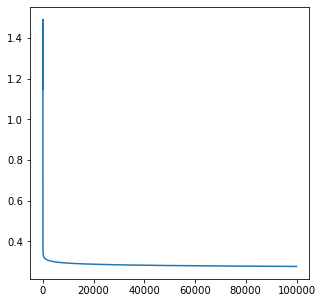

In [30]:
plt.plot(loss)

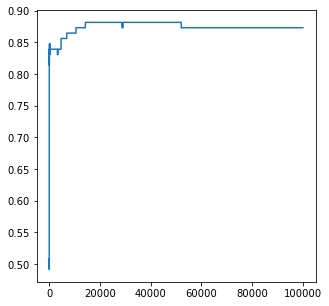

In [31]:
plt.plot(accuracy)

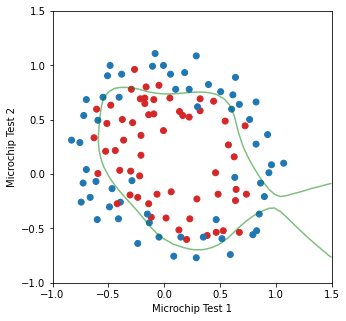

In [32]:
helper.plot_micro(Xmicro_mf, ymicro, theta, degree)

Regularization parameter `rp`를 변경하면서 decision boundary가 어떻게 변하는지 관찰하세요.

## Problem 5

- 다음을 적용해보고, 이중에서 underfitting, overfitting이 일어나 보이는 경우는 어떤 경우인지 판별하세요

- `num_epoch = 100000`

1. `rp=0`, `lr=10`
2. `rp=1`, `lr=5`
3. `rp=10`, `lr=1`
4. `rp=100`, `lr=0.1`

답 작성)  1. overfitting  
         2. good fit  
         3. underfitting  
         4. underfitting  